https://www.kaggle.com/code/marto24/beginners-prediction-top3

https://www.kaggle.com/code/dejavu23/house-prices-eda-to-ml-beginner#Part-2:-Data-wrangling

https://www.kaggle.com/code/eisgandar/house-prices-predictions-jump-top-1

https://www.kaggle.com/code/marto24/beginners-prediction-top3

In [1]:
# Importing the Libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
# importing the Data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print('X'*10)
print(test.shape)

(1460, 81)
XXXXXXXXXX
(1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing Valus:

In [8]:
Names_train = []
per_list = []
for col in train.columns:
        if  train[col].isnull().sum() * 100 / len(train) > 45:
                per_list.append(train[col].isnull().sum() * 100 / len(train))
                Names_train.append(col)

null_train = pd.concat([pd.Series(Names_train, name= 'Feature name'), pd.Series(per_list, name = 'Null Percentage')], axis = 1)


In [9]:
null_train

,Feature name,Null Percentage
0,Alley,93.767123
1,FireplaceQu,47.260274
2,PoolQC,99.520548
3,Fence,80.753425
4,MiscFeature,96.301370


In [10]:
Names_test = []
per_list2 = []
for col in test.columns:
        if test[col].isnull().sum() * 100 / len(test) > 45:
                per_list2.append(test[col].isnull().sum() * 100 / len(test))
                Names_test.append(col)

null_test = pd.concat([pd.Series(Names_test, name = 'Feature Name'), pd.Series(per_list2, name = 'Null Percentage')], axis = 1)


In [11]:
null_test

,Feature Name,Null Percentage
0,Alley,92.666210
1,FireplaceQu,50.034270
2,PoolQC,99.794380
3,Fence,80.123372
4,MiscFeature,96.504455


<AxesSubplot:>

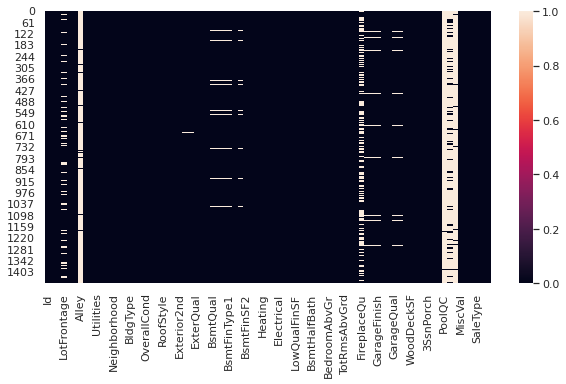

In [12]:
fig, axes = plt.subplots(figsize = (10,5))
sns.heatmap(train.isnull())

<AxesSubplot:>

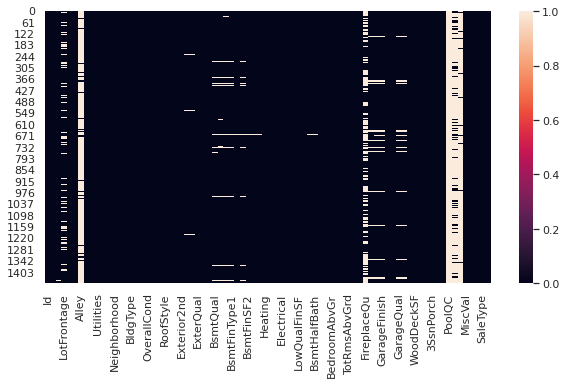

In [13]:
fig, axes = plt.subplots(figsize = (10,5))
sns.heatmap(test.isnull())

The training Dataframe has 81 columns (79 features + id and target SalePrice) and 1460 entries (number of rows or house sales)  
The testing Dataframe has 80 columns (79 features + id) and 1459 entries  
There is lots of info that is probably related to the SalePrice like the area, the neighborhood, the condition and quality.   
Maybe other features are not so important for predicting the target, also there might be a strong correlation for some of the features (like GarageCars and GarageArea).
For some columns many values are missing: only 7 values for Pool QC in df train and 3 in df test

## Exploring the Sale Price

In [14]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

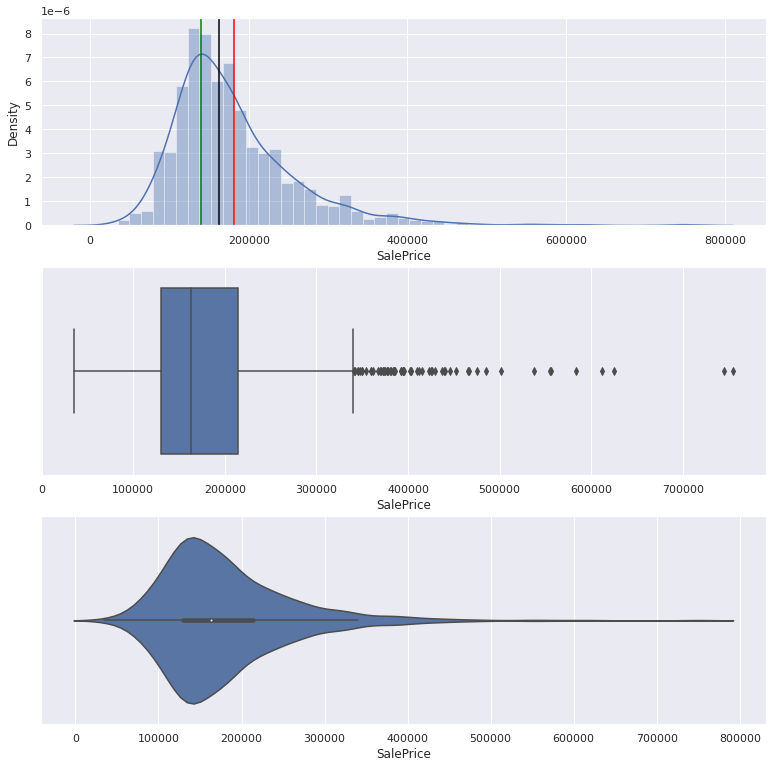

 ---------------------------------------- 
The Skewness of the Sales Price Feature is : 1.8828757597682129
The Kurtosis of the Sales Price Feature is : 6.536281860064529


In [15]:
sns.set()
fig, axes = plt.subplots(3, 1, figsize = (13,13))
sns.distplot(train['SalePrice'], ax = axes[0])
axes[0].axvline(train['SalePrice'].mean(), color = 'red')
axes[0].axvline(train['SalePrice'].mode()[0], color = 'green')
axes[0].axvline(train['SalePrice'].median(), color = 'black')
sns.boxplot(train['SalePrice'], ax = axes[1])
sns.violinplot(train['SalePrice'], ax = axes[2])
plt.show()
print(' ---------------------------------------- ')
print("The Skewness of the Sales Price Feature is :", train['SalePrice'].skew())
print("The Kurtosis of the Sales Price Feature is :", train['SalePrice'].kurt())

#### As we can see the SalePrice (Target Feature) is not normally distributed, Which can reduce the Performance of the ML Regression models.

A good way to treat this , is by log tranformation 

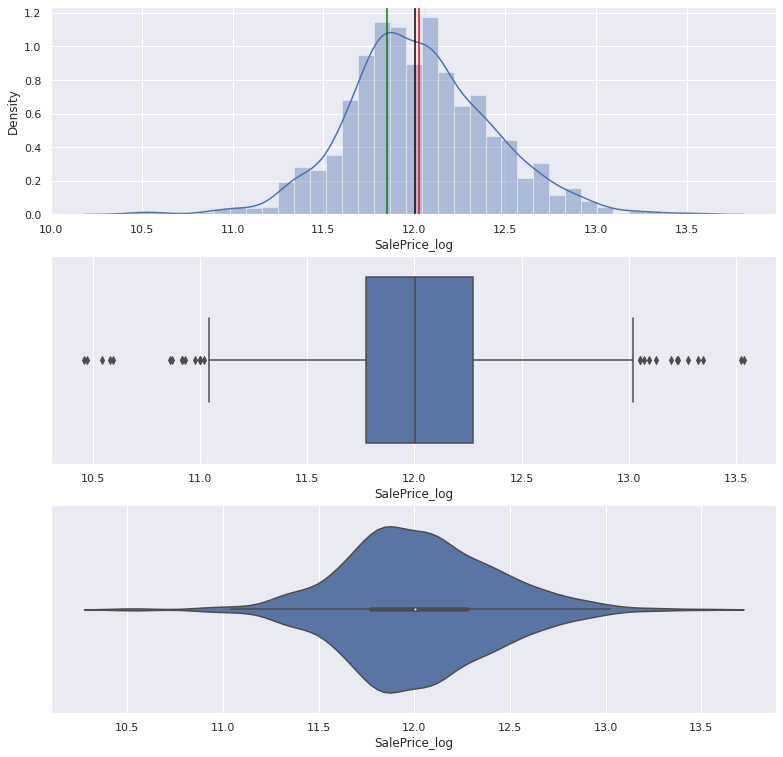

 ---------------------------------------- 
The Skewness of the Sales Price Feature is : 0.12133506220520406
The Kurtosis of the Sales Price Feature is : 0.8095319958036296


In [16]:
train['SalePrice_log'] = np.log(train['SalePrice'])
fig, axes = plt.subplots(3, 1, figsize = (13,13))
sns.distplot(train['SalePrice_log'], ax = axes[0])
axes[0].axvline(train['SalePrice_log'].mean(), color = 'red')
axes[0].axvline(train['SalePrice_log'].mode()[0], color = 'green')
axes[0].axvline(train['SalePrice_log'].median(), color = 'black')
sns.boxplot(train['SalePrice_log'], ax = axes[1])
sns.violinplot(train['SalePrice_log'], ax = axes[2])
plt.show()
print(' ---------------------------------------- ')
print("The Skewness of the Sales Price Feature is :", train['SalePrice_log'].skew())
print("The Kurtosis of the Sales Price Feature is :", train['SalePrice_log'].kurt())

In [17]:
# Dropping the Old Sale Price after we appliedth eLog Transformation: 
train.drop('SalePrice', axis = 1, inplace = True) 

### Numerical Features and Categorical Features

In [18]:
num_fets_train = train.dtypes[train.dtypes != 'object'].index
print(num_fets_train)
print('Number of Numerical Feature is :', len(num_fets_train))
print('===================================================')
cat_fets_train = train.dtypes[train.dtypes =='object'].index
print(cat_fets_train)
print('Number of Categorical Feature is :',len(cat_fets_train))


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_log'],
      dtype='object')
Number of Numerical Feature is : 38
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTyp

In [19]:
train[num_fets_train].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429216


In [20]:
train[cat_fets_train].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### List of Features wWith Missing Values

In [21]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data_train = pd.concat([total, percent], axis = 1, keys = ['Total TrainSet', 'Percent TrainSet'])
missing_data_train.head(20)

,Total TrainSet,Percent TrainSet
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [22]:
print(train['PoolQC'].isnull().sum())
print(train['PoolArea'].isnull().sum())

1453
0


In [23]:
total_test = test.isnull().sum().sort_values(ascending= False)
percent_test = (test.isnull().sum() / test.isnull().count()).sort_values(ascending= False)
missing_data_test = pd.concat ([total_test, percent_test], axis = 1 ,keys=['Total TestSet', 'Percent TestSet'])
missing_data_test.head(20)


,Total TestSet,Percent TestSet
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [24]:
Missing_Values_Df = pd.concat([missing_data_train, missing_data_test], axis = 1)

In [25]:
Missing_Values_Df.head(20)

,Total TrainSet,Percent TrainSet,Total TestSet,Percent TestSet
PoolQC,1453,0.995205,1456.0,0.997944
MiscFeature,1406,0.963014,1408.0,0.965045
Alley,1369,0.937671,1352.0,0.926662
Fence,1179,0.807534,1169.0,0.801234
FireplaceQu,690,0.472603,730.0,0.500343
LotFrontage,259,0.177397,227.0,0.155586
GarageYrBlt,81,0.055479,78.0,0.053461
GarageCond,81,0.055479,78.0,0.053461
GarageType,81,0.055479,76.0,0.052090
GarageFinish,81,0.055479,78.0,0.053461


**Filling missing values**  
For a few columns there is lots of NaN entries.  
However, reading the data description we find this is not missing data:  
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.  

In [26]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']
# Replace the 'NaN' Values with 'None' in these columns
for col in cols_fillna:
    train[col].fillna('None', inplace = True)
    test[col].fillna('None', inplace = True)

In [27]:
def null_values(df, keys):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    col_type = df.dtypes
    display (pd.concat([total, percent, col_type], axis = 1, keys = keys))

In [28]:
null_values(train, keys=['total Train', 'Percent Train', 'Column Type'])

,total Train,Percent Train,Column Type
LotFrontage,259,0.177397,float64
GarageYrBlt,81,0.055479,float64
MasVnrArea,8,0.005479,float64
Id,0,0.000000,int64
KitchenAbvGr,0,0.000000,int64
...,...,...,...
ExterQual,0,0.000000,object
MasVnrType,0,0.000000,object
Exterior2nd,0,0.000000,object
Exterior1st,0,0.000000,object


In [29]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
train.fillna(train.mean(), inplace=True)

In [30]:
null_values(test , keys = ['Total Test', 'Percent Test', 'Column Type'])

,Total Test,Percent Test,Column Type
LotFrontage,227,0.155586,float64
GarageYrBlt,78,0.053461,float64
MasVnrArea,15,0.010281,float64
BsmtFullBath,2,0.001371,float64
BsmtHalfBath,2,0.001371,float64
...,...,...,...
MasVnrType,0,0.000000,object
Exterior2nd,0,0.000000,object
Exterior1st,0,0.000000,object
RoofMatl,0,0.000000,object


In [31]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
test.fillna(test.mean(), inplace=True)

we will use the mean for the feature -----> (LotFrontage, GarageYrBlt, MasVnrArea) to fill in the null values for both Training and Test Test. 

In [32]:
null_values(train, keys=['total Train', 'Percent Train', 'Column Type'])

,total Train,Percent Train,Column Type
Id,0,0.0,int64
CentralAir,0,0.0,object
GarageYrBlt,0,0.0,float64
GarageType,0,0.0,object
FireplaceQu,0,0.0,object
...,...,...,...
MasVnrArea,0,0.0,float64
MasVnrType,0,0.0,object
Exterior2nd,0,0.0,object
Exterior1st,0,0.0,object


In [33]:
null_values(test , keys = ['Total Test', 'Percent Test', 'Column Type'])

,Total Test,Percent Test,Column Type
Id,0,0.0,int64
MSSubClass,0,0.0,int64
GarageType,0,0.0,object
FireplaceQu,0,0.0,object
Fireplaces,0,0.0,int64
...,...,...,...
MasVnrType,0,0.0,object
Exterior2nd,0,0.0,object
Exterior1st,0,0.0,object
RoofMatl,0,0.0,object


### Any Other Missing Values ? 

In [34]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


HELLLLL NOOOOOOOOOOOOO :) :) :)

In [35]:
# Correlation matrix
train['OverallQual'].corr(train['SalePrice_log'])

0.8171844179216831

### log transform
Like the target variable, also some of the feature values are not normally distributed and it is therefore better to use log values in df_train and df_test. Checking for skewness and kurtosis:

In [36]:
train[num_fets_train].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [37]:
for col in num_fets_train:
    print(col, '  Skewness= {:05.2f}'.format(train[col].skew()), '  Kurtosis= {:05.2f}'.format(train[col].kurt()))

Id   Skewness= 00.00   Kurtosis= -1.20
MSSubClass   Skewness= 01.41   Kurtosis= 01.58
LotFrontage   Skewness= 02.38   Kurtosis= 21.85
LotArea   Skewness= 12.21   Kurtosis= 203.24
OverallQual   Skewness= 00.22   Kurtosis= 00.10
OverallCond   Skewness= 00.69   Kurtosis= 01.11
YearBuilt   Skewness= -0.61   Kurtosis= -0.44
YearRemodAdd   Skewness= -0.50   Kurtosis= -1.27
MasVnrArea   Skewness= 02.68   Kurtosis= 10.15
BsmtFinSF1   Skewness= 01.69   Kurtosis= 11.12
BsmtFinSF2   Skewness= 04.26   Kurtosis= 20.11
BsmtUnfSF   Skewness= 00.92   Kurtosis= 00.47
TotalBsmtSF   Skewness= 01.52   Kurtosis= 13.25
1stFlrSF   Skewness= 01.38   Kurtosis= 05.75
2ndFlrSF   Skewness= 00.81   Kurtosis= -0.55
LowQualFinSF   Skewness= 09.01   Kurtosis= 83.23
GrLivArea   Skewness= 01.37   Kurtosis= 04.90
BsmtFullBath   Skewness= 00.60   Kurtosis= -0.84
BsmtHalfBath   Skewness= 04.10   Kurtosis= 16.40
FullBath   Skewness= 00.04   Kurtosis= -0.86
HalfBath   Skewness= 00.68   Kurtosis= -1.08
BedroomAbvGr   Skewnes

The distribution of different Numerical Features

Skewness=  1.3665603560164552
Kurtosis=  4.895120580693174


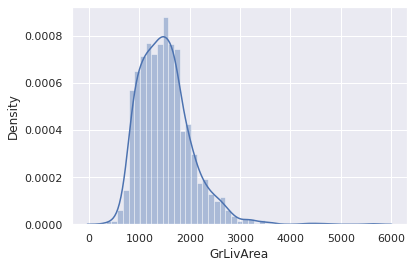

In [38]:
sns.distplot(train['GrLivArea'])
print('Skewness= ' ,train['GrLivArea'].skew())
print('Kurtosis= ',train['GrLivArea'].kurt())

Skewness=  12.207687851233496
Kurtosis=  203.24327101886033


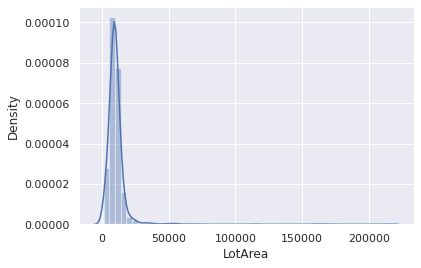

In [39]:
sns.distplot(train['LotArea'])
print('Skewness= ', train['LotArea'].skew())
print('Kurtosis= ', train['LotArea'].kurt())

In [40]:
for df in [train, test]:
    df['GrLivArea_log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    df['LotArea_log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace = True, axis = 1)

Skewness=  -0.006995182187690808
Kurtosis=  0.28260268850118564


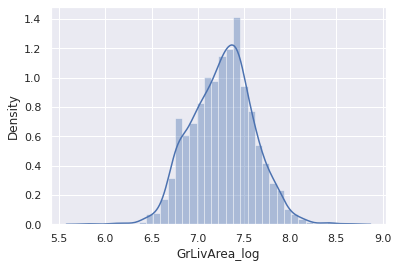

In [41]:
sns.distplot(train['GrLivArea_log'])
print('Skewness= ', train['GrLivArea_log'].skew())
print('Kurtosis= ', train['GrLivArea_log'].kurt())

Skewness=  -0.1379938086958118
Kurtosis=  4.713358369108622


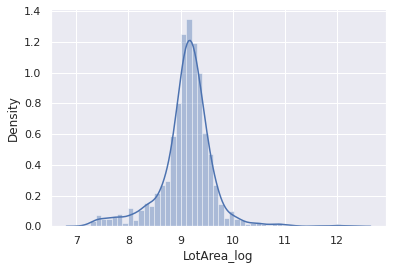

In [42]:
sns.distplot(train['LotArea_log'])
print('Skewness= ', train['LotArea_log'].skew())
print('Kurtosis= ', train['LotArea_log'].kurt())

In [43]:
num_fets_train = train.dtypes[train.dtypes != 'object'].index

In [44]:
num_fets_train

Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice_log', 'GrLivArea_log', 'LotArea_log'],
      dtype='object')

#### Sales Price Relationship With Numerical Features

Feature Name: MSSubClass      Correlation coefficient = -0.07      P- Vaue = 0.00
Feature Name: LotFrontage      Correlation coefficient = 0.34      P- Vaue = 0.00
Feature Name: OverallQual      Correlation coefficient = 0.82      P- Vaue = 0.00
Feature Name: OverallCond      Correlation coefficient = -0.04      P- Vaue = 0.16
Feature Name: YearBuilt      Correlation coefficient = 0.59      P- Vaue = 0.00
Feature Name: YearRemodAdd      Correlation coefficient = 0.57      P- Vaue = 0.00
Feature Name: MasVnrArea      Correlation coefficient = 0.43      P- Vaue = 0.00
Feature Name: BsmtFinSF1      Correlation coefficient = 0.37      P- Vaue = 0.00
Feature Name: BsmtFinSF2      Correlation coefficient = 0.00      P- Vaue = 0.85
Feature Name: BsmtUnfSF      Correlation coefficient = 0.22      P- Vaue = 0.00
Feature Name: TotalBsmtSF      Correlation coefficient = 0.61      P- Vaue = 0.00
Feature Name: 1stFlrSF      Correlation coefficient = 0.60      P- Vaue = 0.00
Feature Name: 2ndFlrSF  

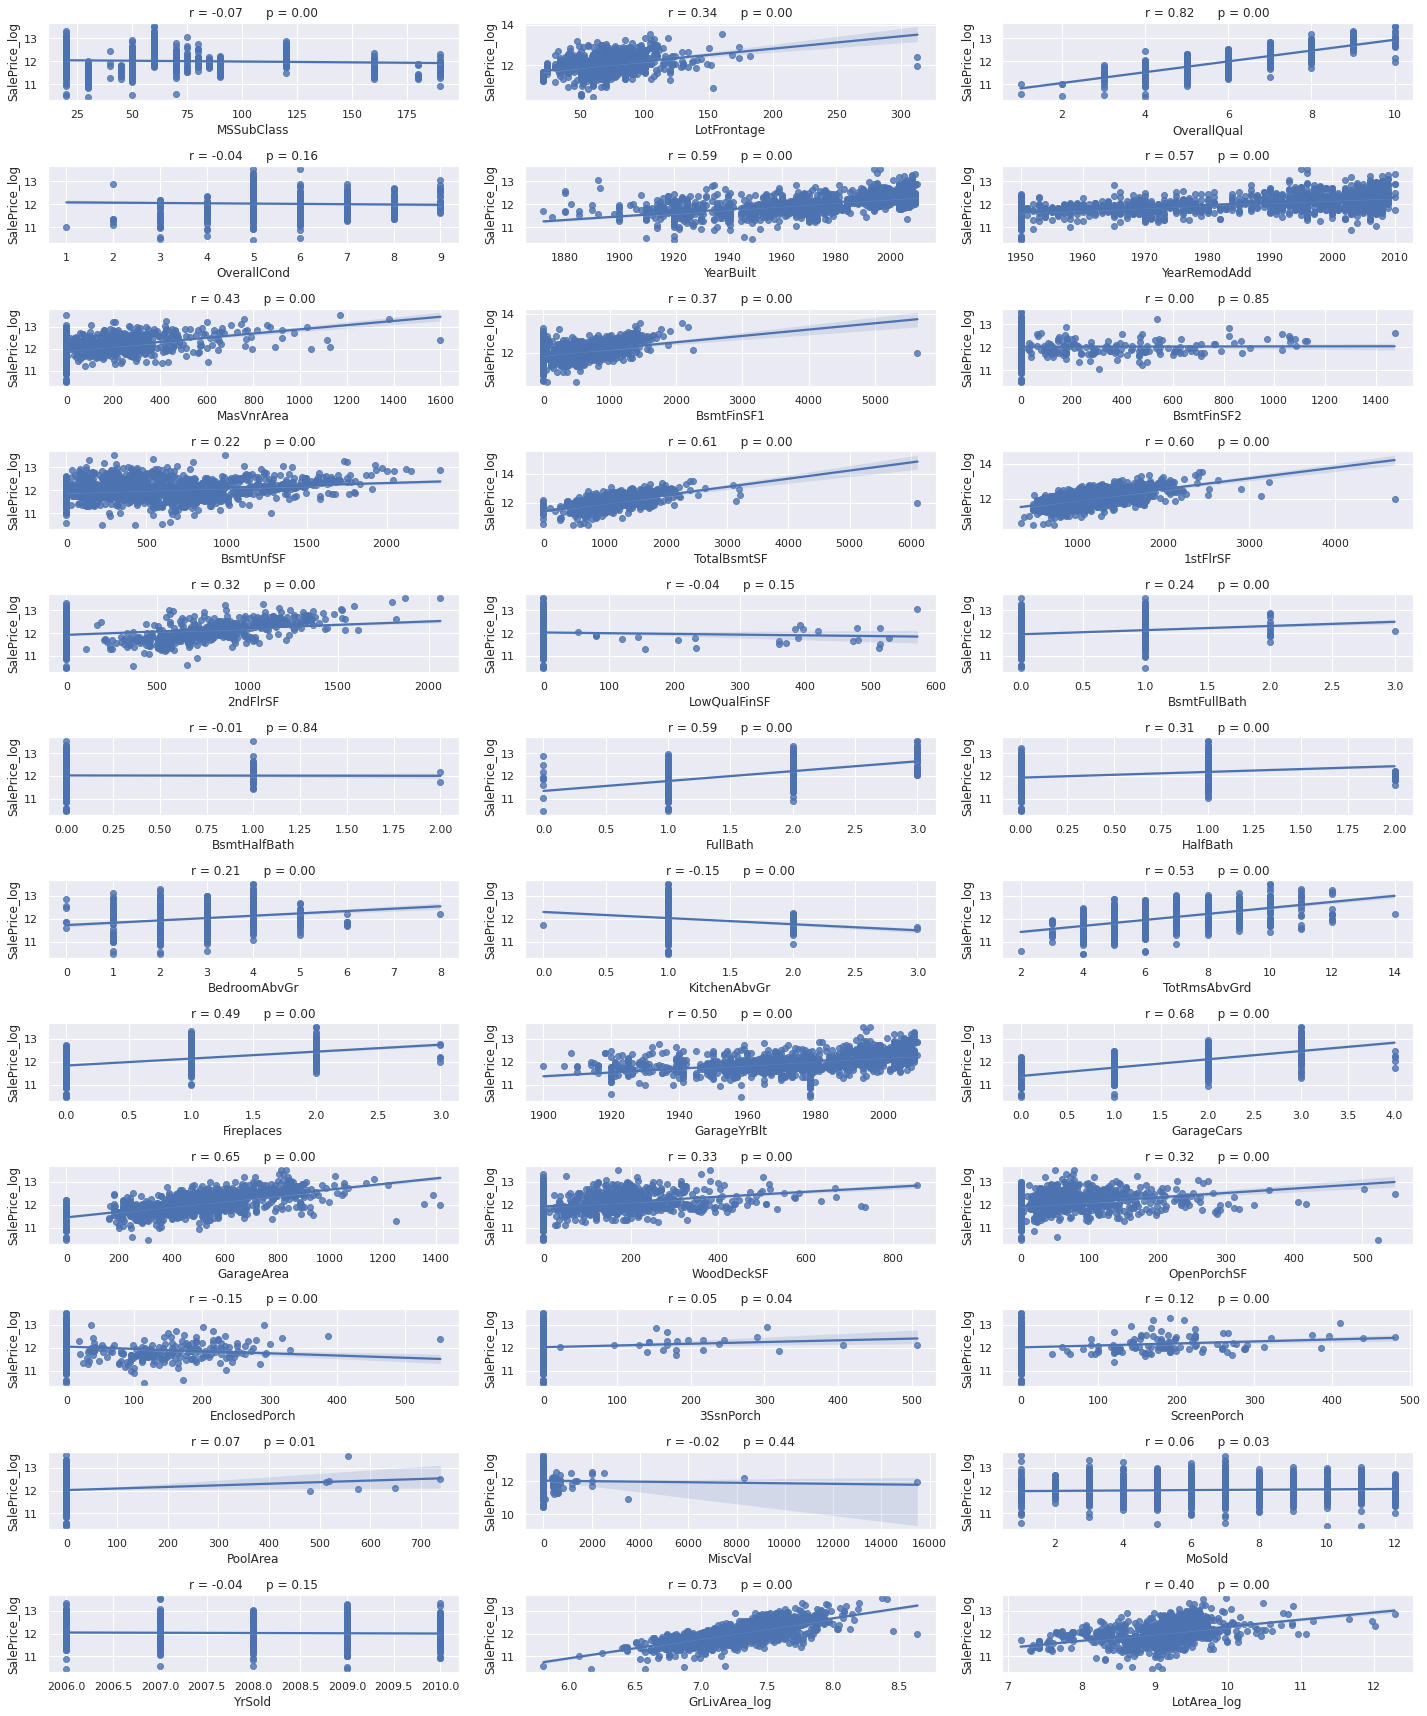

In [45]:
from scipy import stats
to_plot = [c for c in num_fets_train if c not in ['Id', 'SalePrice_log']]
fig, ax = plt.subplots(int(len(to_plot)/3), 3, figsize = (20,24))

i = 0
for row in range (0,12):
    for col in range (0,3):
        if i < int(len(to_plot)):
            stp = stats.pearsonr(train[to_plot[i]], train['SalePrice_log'])
            sns.regplot(train[to_plot[i]], train['SalePrice_log'], ax = ax[row][col])
            str_title = str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            ax[row][col].set_title(str_title)
            print('Feature Name: {}     '.format(to_plot[i]) ,"Correlation coefficient = " + "{0:.2f}".format(stp[0]) + "      " "P- Vaue = " + "{0:.2f}".format(stp[1]))
        i+=1
plt.tight_layout()

#### Dealing with outliers in Features With correlation coefficient greater than 0.7
- OverallQual 
- GrLivArea_log

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice_log'>

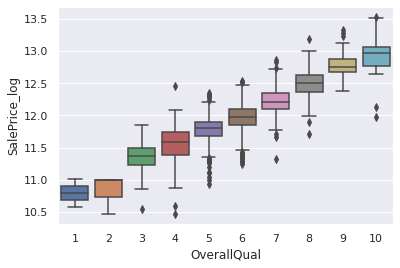

In [46]:
sns.boxplot(train['OverallQual'], train['SalePrice_log'])

<AxesSubplot:xlabel='GrLivArea_log', ylabel='SalePrice_log'>

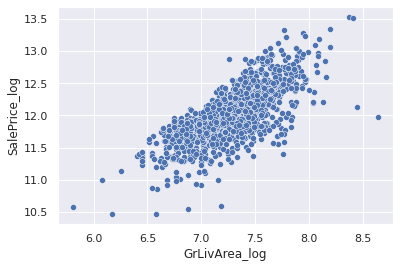

In [47]:
sns.scatterplot(train['GrLivArea_log'], train['SalePrice_log'])

Dropping the index which classified as outliers: 
- OverallQual : Over all quality = 10 and sales_price_log < 12.3 --- To be Dropped
- GrLivArea_log : General living Area > 8.3 and Sale Price Log < 12.5 --- To be Dropped


In [48]:
train = train.drop(train[(train['OverallQual'] == 10) & (train['SalePrice_log']<12.3)].index)

In [49]:
df_train = train.drop(
    train[(train['GrLivArea_log'] > 8.3) & (train['SalePrice_log']<12.5)].index)

In [50]:
corr = train.corr().abs()

In [51]:
ser_cor = corr.nlargest(len(num_fets_train), 'SalePrice_log')['SalePrice_log']

In [52]:
# we will set the correlation thershold to be 0.4
# create Two lists (One for features correlated with the target above the threshold, andanother list for features correlated below the threshold)
min_corr = 0.4
cols_above_thre = [ser_cor.index[c] for c in range(len(ser_cor)) if ser_cor[c] > min_corr]
cols_below_thre = [ser_cor.index[c] for c in range(len(ser_cor)) if ser_cor[c] <= min_corr]

In [53]:
print(ser_cor)
print("*"*30)
print("List of numerical features with correlation coeff. above the threshold :")
print(cols_above_thre)
print("*"*30)
print("List of numerical features with correlation ceoff. below the threshold :")
print(cols_below_thre)

SalePrice_log    1.000000
OverallQual      0.821404
GrLivArea_log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePr

List of Categorical Features and there unique values : 

In [54]:
for cat in list(cat_fets_train):
    print(train[cat].value_counts())
    print('*' * 30)

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
******************************
Pave    1452
Grvl       6
Name: Street, dtype: int64
******************************
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64
******************************
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64
******************************
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64
******************************
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64
******************************
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
******************************
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64
******************************
NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
S

#### Sales Price Relationship With Categorical Features

In [55]:
list(cat_fets_train)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

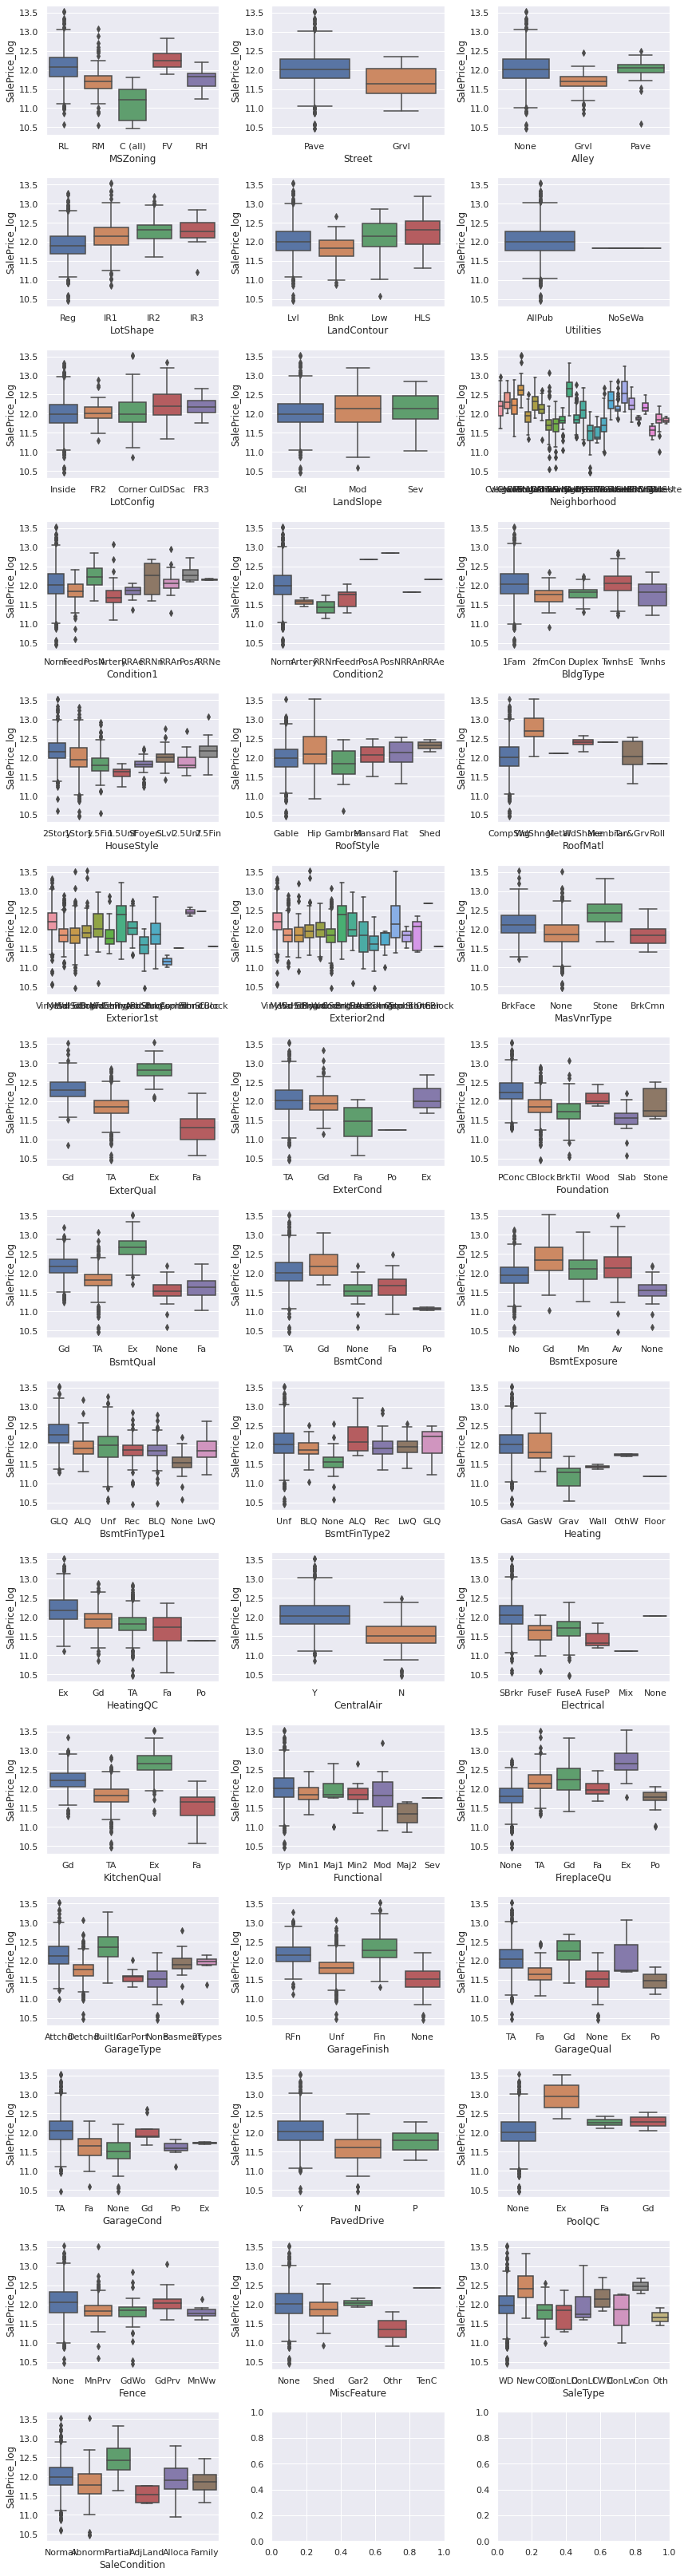

In [56]:
n_rows = 15
n_cols = 3 
fig , axes = plt.subplots(n_rows, n_cols, figsize = (n_cols*4,n_rows*3))
i = 0
for r in range(0,n_rows):
    for c in range(0,n_cols):
        if i < len(cat_fets_train):
            sns.boxplot(train[cat_fets_train[i]], train['SalePrice_log'], ax = axes[r][c])
        i+=1
plt.tight_layout()
plt.show()

Look at the feature "MSZoning". The mean SalePrice for category "C(all)" is much lower than for the other categories. And the mean SalePrice for categories "RM" and "RH" is lower than for "RL" and "FV". So, there is a large probability that a House of category "C(all)" has lower SalePrice than one of category "FV".
In contrast, look at the feature "LandCountour", where the SalePrice for all categories is nearly the same.
For the Regression models, I only use those features that show a strong and clear relation to SalePrice in order to have a small number of features, keep the models simple and avoid overfitting.

We just look if the SalePrice (mean value and distribution) is significantly different for the different categories of each feature.
For example, look at the feature "MSZoning". The mean SalePrice for category "C(all)" is much lower than for the other categories. And the mean SalePrice for categories "RM" and "RH" is lower than for "RL" and "FV". So, there is a large probability that a House of category "C(all)" has lower SalePrice than one of category "FV".
In contrast, look at the feature "LandCountour", where the SalePrice for all categories is nearly the same.
For the Regression models, I only use those features that show a strong and clear relation to SalePrice in order to have a small number of features, keep the models simple and avoid overfitting.

In [57]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition']

In [58]:
nr_feats = len (cols_above_thre)

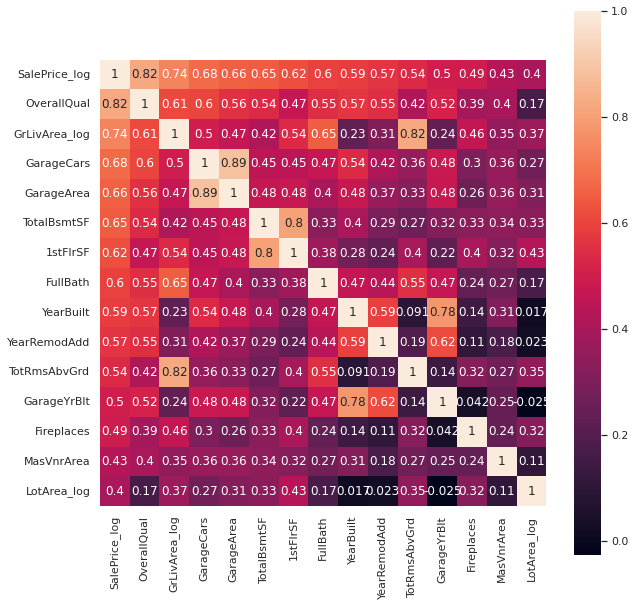

In [59]:
fig, ax = plt.subplots(figsize = (10,10))         # Sample figsize in inches
sns.heatmap(train[cols_above_thre].corr(), annot = True, ax =ax, square = True)
plt.show()

The Above Heatmap shows the Features with largest correlation to the target (SlaePrice). 
But We can also Notice that some of these Features are correlated with Each Others. Such Kind of Thing is called -Multicollinearity- 

## Data Wrangling

**Drop all columns with only small correlation to SalePrice**  
**Transform Categorical to numerical**  
**Handling columns with missing data**  
**Log values**  
**Drop all columns with strong correlation to similar features**  

Numerical columns : drop similar and low correlation

Categorical columns : Transform  to numerical

### 1. Dropping all columns with weak correlation to SalePrice

In [60]:
train

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_log,GrLivArea_log,LotArea_log
0,1,60,RL,65.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,2,2008,WD,Normal,12.247694,7.444249,9.041922
1,2,20,RL,80.0,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,0,5,2007,WD,Normal,12.109011,7.140453,9.169518
2,3,60,RL,68.0,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,0,9,2008,WD,Normal,12.317167,7.487734,9.328123
3,4,70,RL,60.0,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,0,2,2006,WD,Abnorml,11.849398,7.448334,9.164296
4,5,60,RL,84.0,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,0,12,2008,WD,Normal,12.429216,7.695303,9.565214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,8,2007,WD,Normal,12.072541,7.406711,8.976768
1456,1457,20,RL,85.0,Pave,None,Reg,Lvl,AllPub,Inside,...,MnPrv,None,0,2,2010,WD,Normal,12.254863,7.636752,9.486076
1457,1458,70,RL,66.0,Pave,None,Reg,Lvl,AllPub,Inside,...,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130,7.757906,9.109636
1458,1459,20,RL,68.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,4,2010,WD,Normal,11.864462,6.982863,9.181632


In [61]:
test

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivArea_log,LotArea_log
0,1461,20,RH,80.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,MnPrv,None,0,6,2010,WD,Normal,6.797940,9.360655
1,1462,20,RL,81.0,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,Gar2,12500,6,2010,WD,Normal,7.192182,9.565704
2,1463,60,RL,74.0,Pave,None,IR1,Lvl,AllPub,Inside,...,None,MnPrv,None,0,3,2010,WD,Normal,7.395722,9.534595
3,1464,60,RL,78.0,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,6,2010,WD,Normal,7.380256,9.208138
4,1465,120,RL,43.0,Pave,None,IR1,HLS,AllPub,Inside,...,None,None,None,0,1,2010,WD,Normal,7.154615,8.518193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,6,2006,WD,Normal,6.995766,7.568379
1455,2916,160,RM,21.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,4,2006,WD,Abnorml,6.995766,7.546446
1456,2917,20,RL,160.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,9,2006,WD,Abnorml,7.109879,9.903488
1457,2918,85,RL,62.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,MnPrv,Shed,700,7,2006,WD,Normal,6.877296,9.253496


we have already created two lists : 
- a list which includes the numerical features with below the threshold correlation with the target variable. 
- a list which  inludes the categorical features with weak relation to the target variblae

In [62]:
id_test = test['Id']

# cols to drop 
cols_to_drop = ['Id'] + cols_below_thre + catg_weak_corr
for df in [train,test]:
    df.drop(cols_to_drop, axis=1, inplace=True)

In [63]:
print(train.shape)
print(test.shape)

(1458, 25)
(1459, 24)


### Convert Categorical Features into Nmerical Features

For those categorcial features where the EDA with boxplots seem to show a strong dependence of the SalePrice on the category, we transform the columns to numerical.
To investigate the relation of the categories to SalePrice in more detail, we make violinplots for these features 
Also, we look at the mean of SalePrice as function of category.

In [64]:
catg_list = catg_strong_corr.copy()

In [65]:
train['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1458, dtype: object

In [66]:
train[catg_strong_corr].describe(include = 'all')

,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,CentralAir,Electrical,KitchenQual,SaleType
count,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458
unique,5,25,8,4,4,5,2,6,4,9
top,RL,NAmes,Norm,None,TA,TA,Y,SBrkr,TA,WD
freq,1149,225,1444,872,906,649,1363,1332,735,1267


In [67]:
len(catg_list)

10

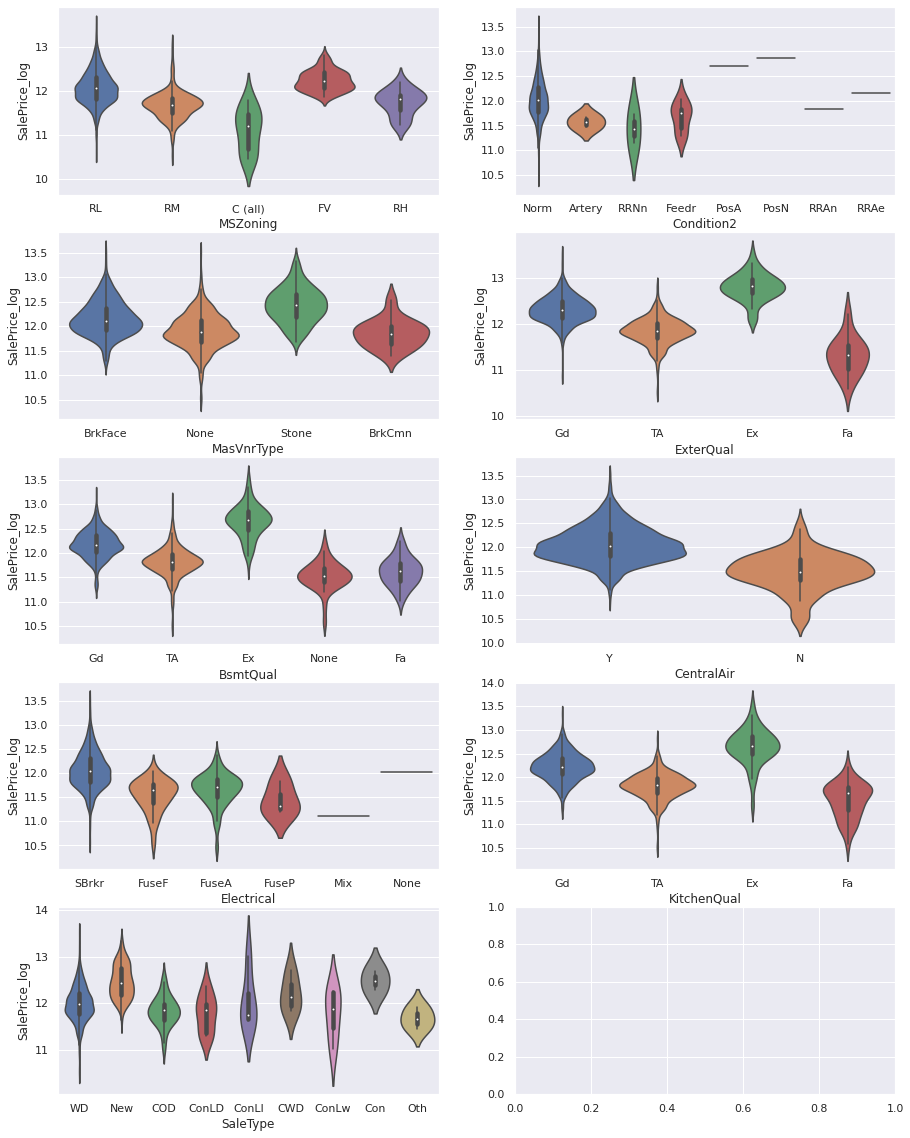

In [68]:
import math
catg_list.remove('Neighborhood')
n_rows = len(catg_list)
n_cols = (len(catg_list)/5)
fets = 0
fig, axes = plt.subplots(5, 2, figsize = (15,20))
for r in range(0, n_rows + 1):
    for c in range(0, int(math.ceil(n_cols))):
        if fets < n_rows:
            sns.violinplot(train[catg_list[fets]], train['SalePrice_log'], ax = axes[r][c])
            fets += 1

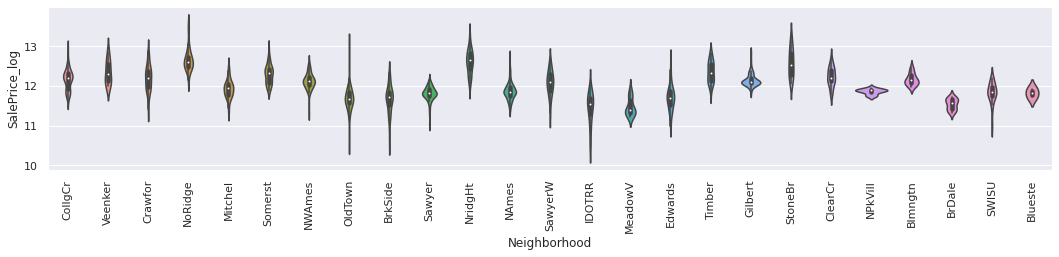

In [69]:
fig, ax = plt.subplots(figsize = (18,3))
sns.violinplot(train['Neighborhood'], train['SalePrice_log'])
plt.xticks(rotation = 90)
plt.show()

In [70]:
train.groupby('MSZoning')['SalePrice_log'].mean()

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePrice_log, dtype: float64

In [71]:
for cat in catg_list:
    print(train.groupby(cat)['SalePrice_log'].mean())

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePrice_log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: SalePrice_log, dtype: float64
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_log, dtype: float64
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_log, dtype: float64
CentralAir
N    11.491858
Y    12.061099
Name: SalePrice_log, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061474
Name: SalePrice_log, dtype: float64
KitchenQual
Ex    12.645425
F

In [72]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [73]:
for df in [train, test]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  

### Checking correlation to SalePrice for the new numerical columns (were Categorical)

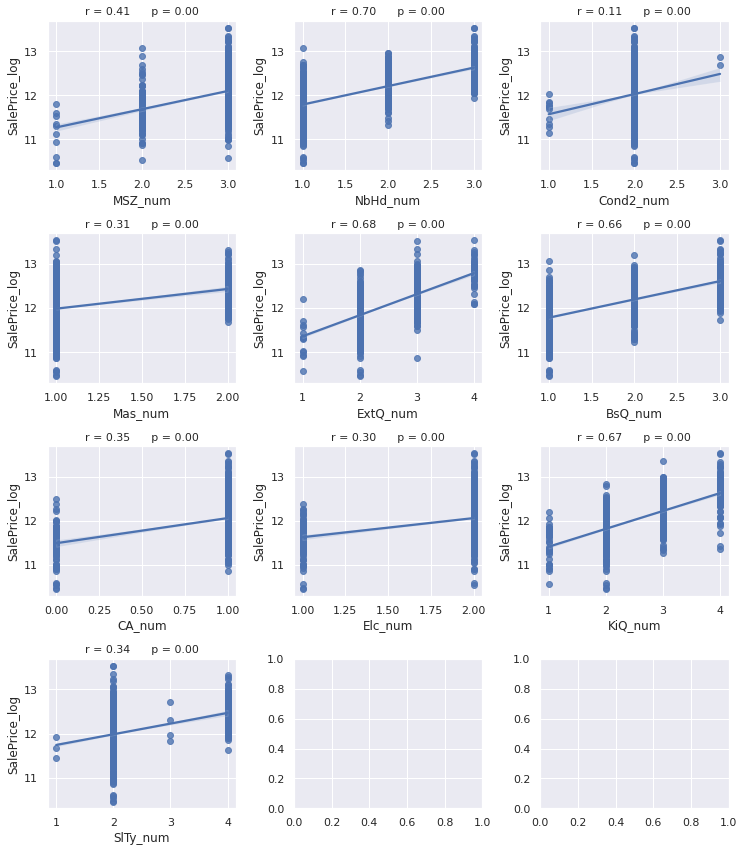

In [74]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(train[new_col_num[i]], train['SalePrice_log'], ax = axs[r][c])
            stp = stats.pearsonr(train[new_col_num[i]], train['SalePrice_log']) # its a very important parameter to calculate as it gives a hint of correlation to the target
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

In [75]:
train.columns

Index(['MSZoning', 'Neighborhood', 'Condition2', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', 'CentralAir', 'Electrical', '1stFlrSF', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SaleType', 'SalePrice_log',
       'GrLivArea_log', 'LotArea_log', 'MSZ_num', 'NbHd_num', 'Cond2_num',
       'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num',
       'SlTy_num'],
      dtype='object')

In [76]:
catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

In [77]:
corr1 = train.corr().abs()

In [78]:
ser_corr1 = corr1.nlargest(len(train.columns), 'SalePrice_log')['SalePrice_log']

In [79]:
print(ser_corr1)

SalePrice_log    1.000000
OverallQual      0.821404
GrLivArea_log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_log      0.402814
CA_num           0.351598
SlTy_num         0.337469
Mas_num          0.313280
Elc_num          0.304857
Cond2_num        0.107610
Name: SalePrice_log, dtype: float64


We will have to drop all the coumns that are below the correlation limit

In [80]:
cols_above_corr_limit = ser_corr1[ser_corr1.values > min_corr].index

In [81]:
cols_above_corr_limit

Index(['SalePrice_log', 'OverallQual', 'GrLivArea_log', 'NbHd_num', 'ExtQ_num',
       'GarageCars', 'KiQ_num', 'BsQ_num', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_log'],
      dtype='object')

In [82]:
cols_below_corr_limit = ser_corr1[ser_corr1.values < min_corr].index

In [83]:
cols_below_corr_limit

Index(['CA_num', 'SlTy_num', 'Mas_num', 'Elc_num', 'Cond2_num'], dtype='object')

In [84]:
train.shape

(1458, 35)

In [85]:
test.shape

(1459, 34)

In [86]:
for df in [train, test] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_below_corr_limit, inplace= True, axis = 1)

In [87]:
train.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageCars,GarageArea,SalePrice_log,GrLivArea_log,LotArea_log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RL,7,2003,2003,196.0,856,856,2,8,0,...,2,548,12.247694,7.444249,9.041922,3,2,3,2,3
1,RL,6,1976,1976,0.0,1262,1262,2,6,1,...,2,460,12.109011,7.140453,9.169518,3,2,2,2,2
2,RL,7,2001,2002,162.0,920,920,2,6,1,...,2,608,12.317167,7.487734,9.328123,3,2,3,2,3
3,RL,7,1915,1970,0.0,756,961,1,7,1,...,3,642,11.849398,7.448334,9.164296,3,2,2,1,3
4,RL,8,2000,2000,350.0,1145,1145,2,9,1,...,3,836,12.429216,7.695303,9.565214,3,3,3,2,3


**List of ALL features with strong correlation to SalePrice_Log**  
after dropping all coumns with weak correlation

In [88]:
correlation = train.corr().abs()
number_of_all_cols = len(train.columns)
correlation.nlargest(number_of_all_cols, 'SalePrice_log')['SalePrice_log']

SalePrice_log    1.000000
OverallQual      0.821404
GrLivArea_log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_log      0.402814
Name: SalePrice_log, dtype: float64

<AxesSubplot:>

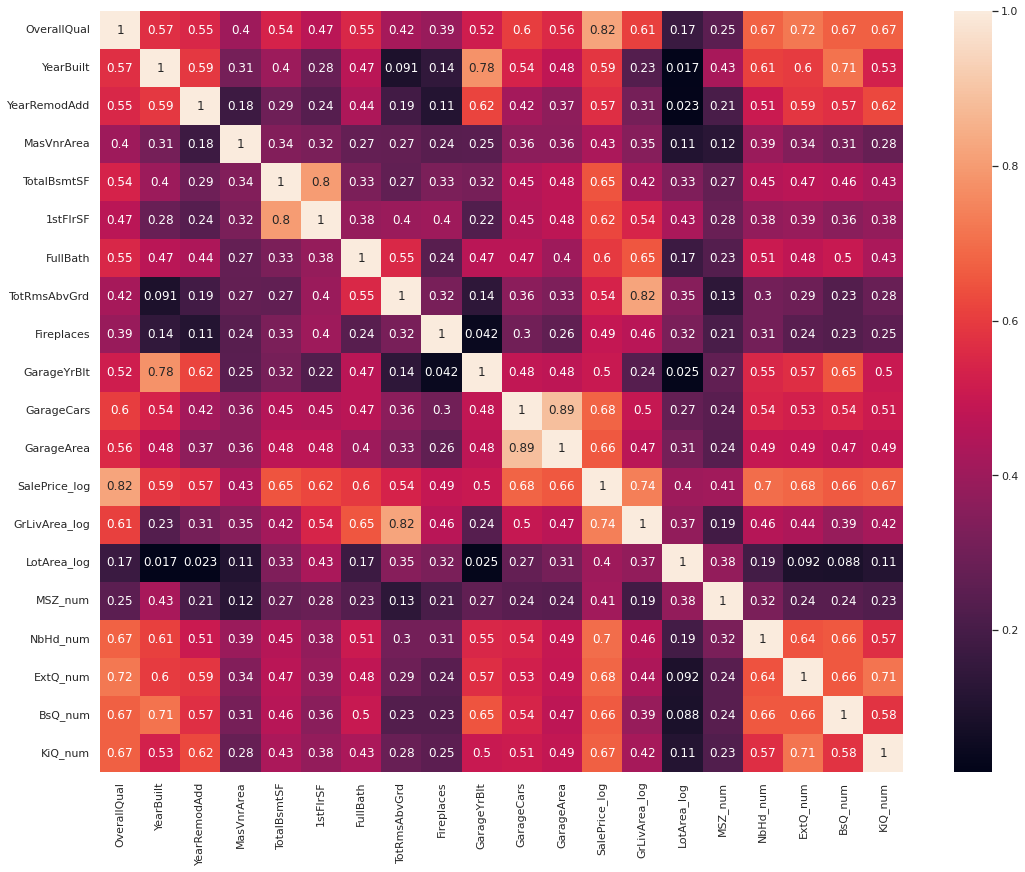

In [89]:
fig, axes = plt.subplots(figsize = (18,14))
sns.heatmap(correlation, annot = True)

**Check for Multicollinearity**

Strong correlation of these features to other, similar features:

'GrLivArea_Log' and 'TotRmsAbvGrd'

'GarageCars' and 'GarageArea'

'TotalBsmtSF' and '1stFlrSF'

'YearBuilt' and 'GarageYrBlt'

**Of those features we drop the one that has smaller correlation coeffiecient to Target.**

In [90]:
cols = list(correlation.nlargest(number_of_all_cols, 'SalePrice_log')['SalePrice_log'].index)

In [91]:
cols

['SalePrice_log',
 'OverallQual',
 'GrLivArea_log',
 'NbHd_num',
 'ExtQ_num',
 'GarageCars',
 'KiQ_num',
 'BsQ_num',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'MSZ_num',
 'LotArea_log']

In [92]:
for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
    if col in cols: 
        cols.remove(col)

In [93]:
print(len(cols))
print(cols)

16
['SalePrice_log', 'OverallQual', 'GrLivArea_log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_log']


**List of features used for the Regressors**

In [94]:
features = cols.copy()
features.remove('SalePrice_log')
print(features)
print(len(features))

['OverallQual', 'GrLivArea_log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_log']
15


In [95]:
train_ml = train[features].copy()
test_ml = test[features].copy()
y = train['SalePrice_log']

**Combine train and test data**  
for one hot encoding (use pandas get dummies) of all categorical features  
uncommenting the following cell increases the number of features  
up to now, all models in Part 3 are optimized for not applying one hot encoder  
when applied, GridSearchCV needs to be rerun

In [96]:
"""
all_data = pd.concat((df_train[feats], df_test[feats]))

li_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',
                  'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']
all_data = pd.get_dummies(all_data, columns=li_get_dummies, drop_first=True)

df_train_ml = all_data[:df_train.shape[0]]
df_test_ml  = all_data[df_train.shape[0]:]
"""

"\nall_data = pd.concat((df_train[feats], df_test[feats]))\n\nli_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',\n                  'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']\nall_data = pd.get_dummies(all_data, columns=li_get_dummies, drop_first=True)\n\ndf_train_ml = all_data[:df_train.shape[0]]\ndf_test_ml  = all_data[df_train.shape[0]:]\n"

### StandardScaler

In [97]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_ml_sc = sc.fit_transform(train_ml)
test_ml_sc = sc.transform(test_ml)

In [98]:
train_ml_sc = pd.DataFrame(train_ml_sc)
train_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.658506,0.539624,0.658963,1.061109,0.313159,0.741127,0.648281,-0.473766,0.793546,1.052959,0.880362,-0.952231,0.521228,0.438861,-0.129585
1,-0.068293,-0.380198,0.658963,-0.689001,0.313159,-0.770150,0.648281,0.504925,0.793546,0.158428,-0.428115,0.605965,-0.574433,0.438861,0.118848
2,0.658506,0.671287,0.658963,1.061109,0.313159,0.741127,0.648281,-0.319490,0.793546,0.986698,0.831900,0.605965,0.331164,0.438861,0.427653
3,0.658506,0.551993,0.658963,-0.689001,1.652119,0.741127,-0.921808,-0.714823,-1.025620,-1.862551,-0.718888,0.605965,-0.574433,0.438861,0.108680
4,1.385305,1.299759,2.162512,1.061109,1.652119,0.741127,0.648281,0.222888,0.793546,0.953567,0.734975,0.605965,1.382104,0.438861,0.889271


In [99]:
X_train = train_ml.copy()
y_train = train['SalePrice_log']
X_test = test_ml.copy()

X_sc = train_ml_sc.copy()
y_sc = train['SalePrice_log']
X_test_sc = test_ml_sc.copy()

# Scikit-learn basic regression models and comparison of results

**Test simple sklearn models and compare by metrics**

**We test the following Regressors from scikit-learn:**  
LinearRegression  
Ridge  
Lasso  
Elastic Net  
Stochastic Gradient Descent  
DecisionTreeRegressor  
RandomForestRegressor  
SVR 

In [100]:
test_ml

,OverallQual,GrLivArea_log,NbHd_num,ExtQ_num,GarageCars,KiQ_num,BsQ_num,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZ_num,LotArea_log
0,5,6.797940,1,2,1.0,2,1,882.0,1,1961,1961,0,0.0,2,9.360655
1,6,7.192182,1,2,1.0,3,1,1329.0,1,1958,1958,0,108.0,3,9.565704
2,5,7.395722,2,2,2.0,2,2,928.0,2,1997,1998,1,0.0,3,9.534595
3,6,7.380256,2,2,2.0,3,1,926.0,2,1998,1998,1,20.0,3,9.208138
4,8,7.154615,3,3,2.0,3,2,1280.0,2,1992,1992,0,0.0,3,8.518193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,6.995766,1,2,0.0,2,1,546.0,1,1970,1970,0,0.0,2,7.568379
1455,4,6.995766,1,2,1.0,2,1,546.0,1,1970,1970,0,0.0,2,7.546446
1456,5,7.109879,1,2,2.0,2,1,1224.0,1,1960,1996,1,0.0,3,9.903488
1457,5,6.877296,1,2,0.0,2,2,912.0,1,1992,1992,0,0.0,3,9.253496


In [101]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'
nr_cv = 5
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

### Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
parameters = {'fit_intercept': [True, False], 'normalize':[True, False], 'copy_X':[True, False]}
grid_linreg = GridSearchCV(linreg, parameters, cv = nr_cv, verbose = 1, scoring= score_calc)
grid_linreg.fit(X_train,y_train)

score_linearreg = get_best_score(grid_linreg)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.13623337683103737
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)


In [103]:
linreg_sc = LinearRegression()
parameters = {'fit_intercept': [True, False], 'normalize':[True, False], 'copy_X':[True, False]}
grid_linreg_sc = GridSearchCV(linreg, parameters, cv = nr_cv, verbose = 1, scoring= score_calc)
grid_linreg_sc.fit(X_sc,y_sc)

score_linearreg_sc = get_best_score(grid_linreg_sc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.1362333768310373
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression(normalize=True)


In [104]:
# WHAT THE HELL IS THIS ??? 

linreg_all = LinearRegression()
linreg_all.fit(X_train, y_train)
pred_linreg_all = linreg_all.predict(X_test)

pred_linreg_all[pred_linreg_all < 0] = pred_linreg_all.mean()


In [105]:
sub_linreg = pd.DataFrame()
sub_linreg['Id'] = id_test
sub_linreg['SalePrice'] = pred_linreg_all

### Ridge Regression

In [106]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize' : [True, False], 'tol': [1e-06,5e-06,1e-05,5e-05]}

grid_ridge = GridSearchCV(ridge, parameters, cv = nr_cv, verbose= 1 , scoring = score_calc)
grid_ridge.fit(X_train, y_train)
score_ridge = get_best_score(grid_ridge)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.13620747796635563
{'alpha': 0.01, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.01, normalize=True, tol=1e-06)


In [107]:
ridge_sc = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize' : [True, False], 'tol': [1e-06,5e-06,1e-05,5e-05]}

grid_ridge_sc = GridSearchCV(ridge, parameters, cv = nr_cv, verbose= 1 , scoring = score_calc)
grid_ridge_sc.fit(X_sc, y_sc)
score_ridge = get_best_score(grid_ridge_sc)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.1362074779663556
{'alpha': 0.01, 'normalize': True, 'tol': 1e-06}
Ridge(alpha=0.01, normalize=True, tol=1e-06)


In [108]:
pred_ridge_all = grid_ridge.predict(X_test)

### LASSO Regression

In [109]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters =  {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, verbose = 1, cv= nr_cv, scoring = score_calc)
grid_lasso.fit(X_train, y_train)

score_lasso = get_best_score(grid_lasso)
pred_lasso = grid_lasso.predict(X_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.13645599450257964
{'alpha': 0.001, 'normalize': False, 'tol': 0.0001}
Lasso(alpha=0.001, normalize=False)


### SGD Regression

In [110]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd, parameters, verbose= 1 , cv = nr_cv, scoring= score_calc)
grid_sgd.fit(X_train, y_train)

score_sgd = get_best_score(grid_sgd)

pred_sgd = grid_sgd.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
2803546771100319.5
{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000)


See How the Result is big , (Because of not using a scaled data set)

In [111]:
pred_sgd

array([-2.09789873e+15, -3.00506306e+15, -2.19534457e+15, ...,
       -2.73158202e+15, -2.16338139e+15, -2.34139309e+15])

In [112]:
# Using a scaled Dataset
sgd_sc = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd_sc = GridSearchCV(sgd_sc, parameters, verbose= 1 , cv = nr_cv, scoring= score_calc)
grid_sgd_sc.fit(X_sc, y_sc)

score_sgd_sc = get_best_score(grid_sgd_sc)

pred_sgd = grid_sgd.predict(X_test_sc)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.13657097092321735
{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000)


### ELASTIC NET Regression

In [134]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()
parameters =  {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}

grid_enet = GridSearchCV(enet, parameters, cv = nr_cv, verbose = 1, scoring = score_calc)

grid_enet.fit(X_train, y_train)
score_enet = get_best_score(grid_enet)

pred_enet = grid_enet.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.14832497889324073
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.001}
ElasticNet(alpha=0.1, l1_ratio=0.04, max_iter=1000000, normalize=False,
           tol=0.001)


In [159]:
enet_sc = ElasticNet()
parameters =  {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}

grid_enet_sc = GridSearchCV(enet_sc, parameters, cv = nr_cv, verbose = 1, scoring = score_calc)

grid_enet_sc.fit(X_sc, y_sc)
score_enet_sc = get_best_score(grid_enet_sc)

pred_enet_sc = grid_enet.predict(X_test_sc)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.13718483696852146
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01}
ElasticNet(alpha=0.1, l1_ratio=0.04, max_iter=1000000, normalize=False,
           tol=0.01)


Not WORKING Peace of Code

In [118]:
# from sklearn.tree import DecisionTreeRegressor
# dec_tree = DecisionTreeRegressor()

# parameters = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
#                'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
#                 'presort': [False,True] , 'random_state': [5] }

# grid_dec_tree = GridSearchCV(dec_tree, parameters, cv= nr_cv, verbose=1, scoring=score_calc)

# grid_dec_tree.fit(X_train, y_train)

# sc_dec_tree = get_best_score(grid_dec_tree)

# pred_dec_tree = grid_dec_tree.predict(X_test)



In [120]:
from sklearn.ensemble import RandomForestRegressor

use_logvals = 1
parameters = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }

random_forest = RandomForestRegressor()
grid_random_forest = GridSearchCV(random_forest, parameters, cv = nr_cv, verbose=1 , refit= True, scoring= score_calc)
grid_random_forest.fit(X_train,y_train)
sc_grid_random_forest = get_best_score(grid_random_forest)

pred_random_forest = grid_random_forest.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.14660163069701856
{'min_samples_split': 4, 'n_estimators': 100, 'random_state': 5}
RandomForestRegressor(min_samples_split=4, random_state=5)


In [121]:
sub_rf = pd.DataFrame()
sub_rf['Id'] = id_test
sub_rf['SalePrice'] = pred_random_forest

if use_logvals == 1 :
    sub_rf['SalePrice'] = np.exp(sub_rf['SalePrice'])

sub_rf.to_csv('rf.csv', index = False)

In [123]:
sub_rf.head(10)

,Id,SalePrice
0,1461,121404.964212
1,1462,130824.396900
2,1463,183372.764889
3,1464,183944.210608
4,1465,198272.459357
5,1466,182039.290710
6,1467,164671.143500
7,1468,175829.325089
8,1469,180844.256443
9,1470,121240.046457


### KNN REGRESSOR

In [137]:
from sklearn.neighbors import KNeighborsRegressor

parameters = param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

knn_reg = KNeighborsRegressor()

grid_knn = GridSearchCV(knn_reg, parameters, cv = nr_cv, verbose= 1, refit = True, scoring= score_calc)

grid_knn.fit(X_train, y_train)

score_knn = get_best_score(grid_knn)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
0.255785377474811
{'algorithm': 'brute', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='brute', n_neighbors=15, weights='distance')


In [153]:
from sklearn.neighbors import KNeighborsRegressor

parameters = param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}

knn_reg_sc = KNeighborsRegressor()

grid_knn_sc = GridSearchCV(knn_reg_sc, parameters, cv = nr_cv, verbose= 1, refit = True, scoring= score_calc)

grid_knn_sc.fit(X_sc, y_sc)

sc_knn_sc = get_best_score(grid_knn_sc)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
0.15614699236217616
{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsRegressor(algorithm='brute', weights='distance')


We can ssee that the algorithm preformed very well on scaled data :)

In [128]:
pred_knn = grid_knn_sc.predict(X_test_sc)

sub_knn = pd.DataFrame()

sub_knn['Id'] = id_test
sub_knn['SalePrice'] = pred_knn

if use_logvals == 1:
    sub_knn['SalePrice'] = np.exp(sub_knn['SalePrice'])

sub_knn.to_csv('knn.csv', index = False)

In [129]:
sub_knn.head(10)

,Id,SalePrice
0,1461,105027.859167
1,1462,123681.301052
2,1463,178767.921687
3,1464,194161.534320
4,1465,206225.287770
5,1466,177981.936038
6,1467,179348.288690
7,1468,175306.888377
8,1469,181974.660774
9,1470,119589.632069


In [139]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel

gpr = GaussianProcessRegressor(random_state=5, alpha=5e-9, 
                                n_restarts_optimizer=0, 
                               optimizer='fmin_l_bfgs_b', 
                               copy_X_train=True)

parameters =  {'normalize_y' : [True,False],
              'kernel' : [DotProduct(), ConstantKernel(1.0, (1e-3, 1e3))] }

grid_gpr = GridSearchCV(gpr, parameters, cv = nr_cv, verbose= 1, scoring= score_calc)
grid_gpr.fit(X_train, y_train)

score_gpr = get_best_score(grid_gpr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.39978484273637704
{'kernel': 1**2, 'normalize_y': True}
GaussianProcessRegressor(alpha=5e-09, kernel=1**2, normalize_y=True,
                         random_state=5)


Very High Score when not using a scaled Data

In [140]:
# trying a scaled Data set
gpr_sc = GaussianProcessRegressor(random_state=5, alpha=5e-9, 
                                n_restarts_optimizer=0, 
                               optimizer='fmin_l_bfgs_b', 
                               copy_X_train=True)

parameters =  {'normalize_y' : [True,False],
              'kernel' : [DotProduct(), ConstantKernel(1.0, (1e-3, 1e3))] }

grid_gpr_sc = GridSearchCV(gpr_sc, parameters, cv = nr_cv, verbose= 1, scoring= score_calc)
grid_gpr_sc.fit(X_sc, y_sc)

score_gpr_sc = get_best_score(grid_gpr_sc)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.13623330316186547
{'kernel': DotProduct(sigma_0=1), 'normalize_y': True}
GaussianProcessRegressor(alpha=5e-09, kernel=DotProduct(sigma_0=1),
                         normalize_y=True, random_state=5)


In [132]:
pred_gpr = grid_gpr_sc.predict(X_test_sc)

sub_gpr = pd.DataFrame()
sub_gpr['Id'] = id_test
sub_gpr['SalePrice'] = pred_gpr

if use_logvals == 1:
    sub_gpr['SalePrice'] = np.exp(sub_gpr['SalePrice'])

sub_gpr.to_csv('gpr.csv', index = False)

In [133]:
sub_gpr

,Id,SalePrice
0,1461,101942.397733
1,1462,154759.695488
2,1463,177510.758453
3,1464,187480.346899
4,1465,199152.365407
...,...,...
1454,2915,82689.202021
1455,2916,86680.735211
1456,2917,160164.416764
1457,2918,122392.734218


### Drawing the Models Scores : 

<AxesSubplot:>

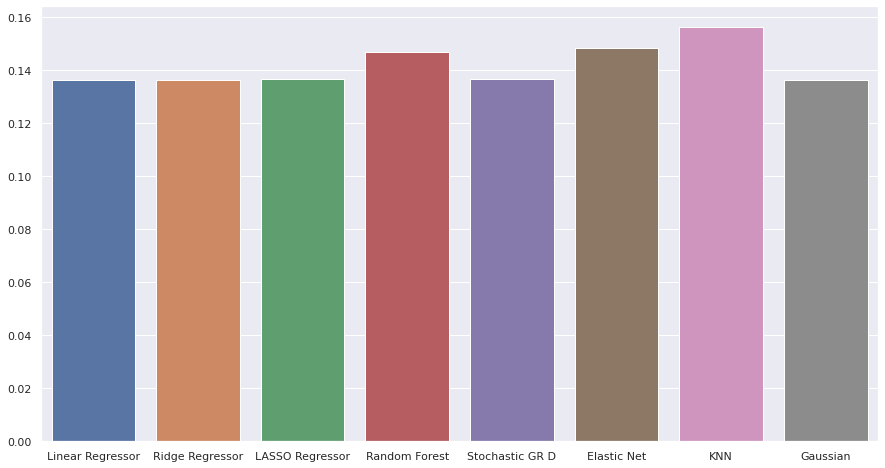

In [152]:
model_scores = [score_linearreg, score_ridge, score_lasso, sc_grid_random_forest, score_sgd_sc, score_enet, sc_knn_sc, score_gpr_sc]
model_names = ['Linear Regressor', 'Ridge Regressor', 'LASSO Regressor', 'Random Forest','Stochastic GR D' ,'Elastic Net', 'KNN', 'Gaussian']


plt.subplots(figsize = (15,8))
sns.barplot(x= model_names, y = model_scores)

In [167]:
for model_name, model_score in zip(model_scores, model_names):
    print(model_name,'-----', model_score)

0.13623337683103737 ----- Linear Regressor
0.1362074779663556 ----- Ridge Regressor
0.13645599450257964 ----- LASSO Regressor
0.14660163069701856 ----- Random Forest
0.13657097092321735 ----- Stochastic GR D
0.14832497889324073 ----- Elastic Net
0.15614699236217616 ----- KNN
0.13623330316186547 ----- Gaussian


The performance of all applied Regressors is very similar, except for KNN which has larger RMSE than the other models.

In [160]:
predictions = {'Linear':pred_linreg_all, 'Ridge':pred_ridge_all, 'LASSO':pred_lasso , 
            'Random Forest': pred_random_forest, 'Stochastic':pred_sgd, 'ElasticNet':pred_enet_sc,
            'KNN':pred_knn, 'Gaussian':pred_gpr}

df_predictions = pd.DataFrame(data = predictions)

In [161]:
df_predictions

,Linear,Ridge,LASSO,Random Forest,Stochastic,ElasticNet,KNN,Gaussian
0,11.532159,11.533740,11.543505,11.706887,1.376059e+12,2.467028,11.561981,11.532163
1,11.949623,11.947144,11.947216,11.781611,-1.853567e+12,2.837159,11.725463,11.949629
2,12.086789,12.087423,12.085410,12.119276,6.053659e+11,3.056561,12.093844,12.086786
3,12.141430,12.140757,12.147419,12.122388,4.930981e+10,3.097971,12.176446,12.141429
4,12.201829,12.202437,12.207496,12.197397,-3.296423e+12,3.028705,12.236724,12.201825
...,...,...,...,...,...,...,...,...
1454,11.322832,11.323212,11.324653,11.338421,3.560857e+12,2.133254,11.370656,11.322844
1455,11.369974,11.370684,11.370847,11.347509,3.498775e+12,2.197536,11.343948,11.369987
1456,11.983957,11.983121,11.983368,11.946782,1.931951e+12,2.910993,11.971635,11.983956
1457,11.714987,11.714134,11.714270,11.606531,1.396893e+12,2.531610,11.514204,11.714990


In [162]:
df_predictions['ID'] = id_test

In [163]:
df_predictions

,Linear,Ridge,LASSO,Random Forest,Stochastic,ElasticNet,KNN,Gaussian,ID
0,11.532159,11.533740,11.543505,11.706887,1.376059e+12,2.467028,11.561981,11.532163,1461
1,11.949623,11.947144,11.947216,11.781611,-1.853567e+12,2.837159,11.725463,11.949629,1462
2,12.086789,12.087423,12.085410,12.119276,6.053659e+11,3.056561,12.093844,12.086786,1463
3,12.141430,12.140757,12.147419,12.122388,4.930981e+10,3.097971,12.176446,12.141429,1464
4,12.201829,12.202437,12.207496,12.197397,-3.296423e+12,3.028705,12.236724,12.201825,1465
...,...,...,...,...,...,...,...,...,...
1454,11.322832,11.323212,11.324653,11.338421,3.560857e+12,2.133254,11.370656,11.322844,2915
1455,11.369974,11.370684,11.370847,11.347509,3.498775e+12,2.197536,11.343948,11.369987,2916
1456,11.983957,11.983121,11.983368,11.946782,1.931951e+12,2.910993,11.971635,11.983956,2917
1457,11.714987,11.714134,11.714270,11.606531,1.396893e+12,2.531610,11.514204,11.714990,2918


In [164]:
df_predictions.corr()

,Linear,Ridge,LASSO,Random Forest,Stochastic,ElasticNet,KNN,Gaussian,ID
Linear,1.000000,0.999988,0.999809,0.979560,-0.824327,0.972780,0.964424,1.000000,-0.063437
Ridge,0.999988,1.000000,0.999835,0.979501,-0.824783,0.972997,0.964849,0.999988,-0.063602
LASSO,0.999809,0.999835,1.000000,0.979870,-0.827388,0.972088,0.964512,0.999809,-0.064045
Random Forest,0.979560,0.979501,0.979870,1.000000,-0.826162,0.948665,0.962787,0.979560,-0.060392
Stochastic,-0.824327,-0.824783,-0.827388,-0.826162,1.000000,-0.749570,-0.795672,-0.824329,0.047499
ElasticNet,0.972780,0.972997,0.972088,0.948665,-0.749570,1.000000,0.938394,0.972779,-0.055764
KNN,0.964424,0.964849,0.964512,0.962787,-0.795672,0.938394,1.000000,0.964424,-0.062930
Gaussian,1.000000,0.999988,0.999809,0.979560,-0.824329,0.972779,0.964424,1.000000,-0.063437
ID,-0.063437,-0.063602,-0.064045,-0.060392,0.047499,-0.055764,-0.062930,-0.063437,1.000000


<AxesSubplot:>

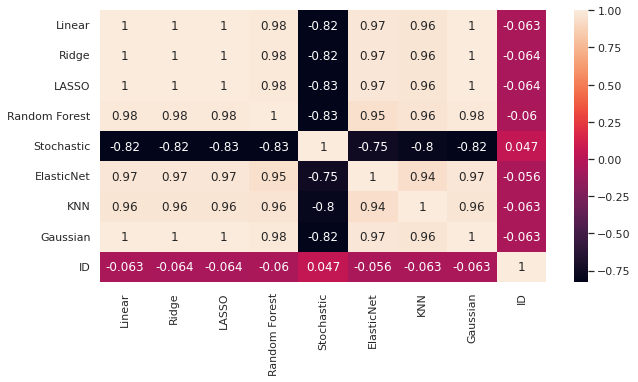

In [166]:
plt.subplots(figsize = (10,5))
sns.heatmap(df_predictions.corr(), annot = True)